In [1]:
import os 
from glob import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import dates as mdates
import datetime as dt
import mplfinance as mpf
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import talib as ta

## Import Data from folder

In [2]:
select_tf = ["day", "60minute"]
tables = [] 
final_data = {}

for filename in tqdm(glob('stock_data/*')):
    names = (filename.split(os.sep)[-1].split('_'))
    company_name = names[0]
    if names[1] in select_tf:
        data = pd.read_csv(filename, index_col=0)
        tf = names[1]
        variable_name = f"{company_name}_{tf}"
        locals()[variable_name] = data
        tables.append(variable_name)
        final_data[variable_name] = data

100%|███████████████████████████████████████████████████████████████████████████████| 808/808 [00:02<00:00, 302.45it/s]


## Section 2
### Pre-Process

In [3]:
def date_corrector(dicta):
    for df_name, df in dicta.items():
            #df.set_index('date', inplace=True)
            df['VolumePositive'] = df['open'] < df['close']
            df['date'] = pd.to_datetime(df['date'])
            df['datec'] = df['date'].dt.date
            df['date'] = df['date'].apply(mdates.date2num)
            df.set_index('datec', inplace=True)
    return dicta

In [4]:
date_corrector(final_data)

{'ACC_60minute':                     date    close     high      low    open  volume  \
 datec                                                                 
 2015-02-02  16468.156250  1545.25  1556.70  1536.05  1554.9   44022   
 2015-02-02  16468.197917  1540.30  1548.00  1538.10  1545.2   16177   
 2015-02-02  16468.239583  1526.00  1544.30  1523.85  1540.3   30934   
 2015-02-02  16468.281250  1535.00  1536.05  1524.15  1527.0   15622   
 2015-02-02  16468.322917  1552.00  1552.00  1531.55  1535.0   29767   
 ...                  ...      ...      ...      ...     ...     ...   
 2022-10-21  19286.239583  2254.00  2267.95  2254.00  2261.4   41742   
 2022-10-21  19286.281250  2256.40  2261.95  2250.60  2254.5   45546   
 2022-10-21  19286.322917  2246.50  2258.00  2241.05  2256.4   39277   
 2022-10-21  19286.364583  2256.60  2260.00  2244.20  2246.4   60867   
 2022-10-21  19286.406250  2257.00  2261.30  2254.30  2256.6   26828   
 
             VolumePositive  
 datec          

In [5]:
ACC_day.tail(20)

date    close     high      low     open   volume  \
datec                                                                   
2022-09-23  19257.770833  2488.90  2585.50  2472.20  2575.00  1396618   
2022-09-26  19260.770833  2378.25  2476.00  2350.00  2460.00  1687672   
2022-09-27  19261.770833  2373.45  2404.70  2313.10  2390.00  1483769   
2022-09-28  19262.770833  2350.30  2409.00  2325.60  2354.00  1257484   
2022-09-29  19263.770833  2374.05  2385.00  2321.30  2370.00  1159023   
2022-09-30  19264.770833  2415.65  2428.00  2360.40  2370.00   896917   
2022-10-03  19267.770833  2301.30  2434.90  2288.00  2419.80  1166442   
2022-10-04  19268.770833  2359.65  2373.30  2288.05  2355.00   714858   
2022-10-06  19270.770833  2381.75  2397.75  2344.00  2371.45   690259   
2022-10-07  19271.770833  2384.75  2400.00  2350.00  2370.15   567262   
2022-10-10  19274.770833  2369.25  2399.90  2350.00  2350.00   383666   
2022-10-11  19275.770833  2311.65  2376.75  2305.70  2375.05   380893   
2022-10-12  19276.770833  2316.80  2339.40  2282.10  2318.00   611941   
2022-10-13  19277.770833  2253.90  2318.00  2242.90  2316.00   528138   
2022-10-14  19278.770833  2243.65  2285.95  2237.05  2272.00   446497   
2022-10-17  19281.770833  2270.10  2285.05  2205.30  2232.00  1512370   
2022-10-18  19282.770833  2219.25  2293.20  2216.00  2259.00  1189726   
2022-10-19  19283.770833  2246.45  2258.40  2212.55  2219.00   724058   
2022-10-20  19284.770833  2287.60  2299.00  2227.95  2230.00   713402   
2022-10-21  19285.770833  2256.55  2300.00  2241.05  2271.00   389554   

            VolumePositive  
datec                       
2022-09-23           False  
2022-09-26           False  
2022-09-27           False  
2022-09-28           False  
2022-09-29            True  
2022-09-30            True  
2022-10-03           False  
2022-10-04            True  
2022-10-06            True  
2022-10-07            True  
2022-10-10            True  
2022-10-11           False  
2022-10-12           False  
2022-10-13           False  
2022-10-14           False  
2022-10-17            True  
2022-10-18           False  
2022-10-19            True  
2022-10-20            True  
2022-10-21           False

## Technical indicator test 

### Doji

In [6]:
df = ACC_day
doji = ta.CDLDOJI(df['open'], df['high'], df['low'], df['close'])

doji = doji[doji != 0]

df['Doji'] = ta.CDLDOJI(df['open'], df['high'], df['low'], df['close'])
df.loc[df['Doji'] !=0]
df['close'].loc[df['Doji'] !=0]

datec
2015-02-06    1507.20
2015-02-20    1620.40
2015-02-24    1618.00
2015-03-20    1569.75
2015-03-24    1583.05
               ...   
2022-09-28    2350.30
2022-09-29    2374.05
2022-10-04    2359.65
2022-10-06    2381.75
2022-10-12    2316.80
Name: close, Length: 298, dtype: float64

In [7]:
def doji(dicta):
    # Loop through each DataFrame in the final_data dictionary
    for df_name, df in dicta.items():
        # Calculate the Doji pattern
        doji = ta.CDLDOJI(df['open'], df['high'], df['low'], df['close'])
    
        # Add the Doji pattern as a new column in the DataFrame
        df['Doji'] = doji

        # Add a new column to indicate whether each pattern is a Doji or not
        df['IsDoji'] = df['Doji'] != 0

    return dicta

In [8]:
doji(final_data)

{'ACC_60minute':                     date    close     high      low    open  volume  \
 datec                                                                 
 2015-02-02  16468.156250  1545.25  1556.70  1536.05  1554.9   44022   
 2015-02-02  16468.197917  1540.30  1548.00  1538.10  1545.2   16177   
 2015-02-02  16468.239583  1526.00  1544.30  1523.85  1540.3   30934   
 2015-02-02  16468.281250  1535.00  1536.05  1524.15  1527.0   15622   
 2015-02-02  16468.322917  1552.00  1552.00  1531.55  1535.0   29767   
 ...                  ...      ...      ...      ...     ...     ...   
 2022-10-21  19286.239583  2254.00  2267.95  2254.00  2261.4   41742   
 2022-10-21  19286.281250  2256.40  2261.95  2250.60  2254.5   45546   
 2022-10-21  19286.322917  2246.50  2258.00  2241.05  2256.4   39277   
 2022-10-21  19286.364583  2256.60  2260.00  2244.20  2246.4   60867   
 2022-10-21  19286.406250  2257.00  2261.30  2254.30  2256.6   26828   
 
             VolumePositive  Doji  IsDoji  
 d

### Moving Averages

In [9]:
def SMA(dicta):
    for df_name, df in dicta.items():
        df['SMA_20'] = df['close'].rolling(20).mean()
        df['SMA_40'] = df['close'].rolling(40).mean()
        df['SMA_200'] = df['close'].rolling(200).mean()
    return dicta

In [10]:
SMA(final_data)

{'ACC_60minute':                     date    close     high      low    open  volume  \
 datec                                                                 
 2015-02-02  16468.156250  1545.25  1556.70  1536.05  1554.9   44022   
 2015-02-02  16468.197917  1540.30  1548.00  1538.10  1545.2   16177   
 2015-02-02  16468.239583  1526.00  1544.30  1523.85  1540.3   30934   
 2015-02-02  16468.281250  1535.00  1536.05  1524.15  1527.0   15622   
 2015-02-02  16468.322917  1552.00  1552.00  1531.55  1535.0   29767   
 ...                  ...      ...      ...      ...     ...     ...   
 2022-10-21  19286.239583  2254.00  2267.95  2254.00  2261.4   41742   
 2022-10-21  19286.281250  2256.40  2261.95  2250.60  2254.5   45546   
 2022-10-21  19286.322917  2246.50  2258.00  2241.05  2256.4   39277   
 2022-10-21  19286.364583  2256.60  2260.00  2244.20  2246.4   60867   
 2022-10-21  19286.406250  2257.00  2261.30  2254.30  2256.6   26828   
 
             VolumePositive  Doji  IsDoji     

In [11]:
ACC_day.columns

Index(['date', 'close', 'high', 'low', 'open', 'volume', 'VolumePositive',
       'Doji', 'IsDoji', 'SMA_20', 'SMA_40', 'SMA_200'],
      dtype='object')

### Bollinger Bands 

In [12]:
def Bollinger_Bands(dicta):
    for df_name, df in dicta.items():
        n = 20
        MA = pd.Series(df['close'].rolling(n).mean())
        STD = pd.Series(df['close'].rolling(n).std())
        bb1 = MA + 2*STD
        df['Upper Bollinger Band'] = pd.Series(bb1)
        bb2 = MA - 2*STD
        df['Lower Bollinger Band'] = pd.Series(bb2)
    return dicta

In [13]:
Bollinger_Bands(final_data)

{'ACC_60minute':                     date    close     high      low    open  volume  \
 datec                                                                 
 2015-02-02  16468.156250  1545.25  1556.70  1536.05  1554.9   44022   
 2015-02-02  16468.197917  1540.30  1548.00  1538.10  1545.2   16177   
 2015-02-02  16468.239583  1526.00  1544.30  1523.85  1540.3   30934   
 2015-02-02  16468.281250  1535.00  1536.05  1524.15  1527.0   15622   
 2015-02-02  16468.322917  1552.00  1552.00  1531.55  1535.0   29767   
 ...                  ...      ...      ...      ...     ...     ...   
 2022-10-21  19286.239583  2254.00  2267.95  2254.00  2261.4   41742   
 2022-10-21  19286.281250  2256.40  2261.95  2250.60  2254.5   45546   
 2022-10-21  19286.322917  2246.50  2258.00  2241.05  2256.4   39277   
 2022-10-21  19286.364583  2256.60  2260.00  2244.20  2246.4   60867   
 2022-10-21  19286.406250  2257.00  2261.30  2254.30  2256.6   26828   
 
             VolumePositive  Doji  IsDoji     

## MACD

In [14]:
def MACD(dicta):
    for df_name, df in dicta.items():
        df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
    return dicta

In [15]:
MACD(final_data)

{'ACC_60minute':                     date    close     high      low    open  volume  \
 datec                                                                 
 2015-02-02  16468.156250  1545.25  1556.70  1536.05  1554.9   44022   
 2015-02-02  16468.197917  1540.30  1548.00  1538.10  1545.2   16177   
 2015-02-02  16468.239583  1526.00  1544.30  1523.85  1540.3   30934   
 2015-02-02  16468.281250  1535.00  1536.05  1524.15  1527.0   15622   
 2015-02-02  16468.322917  1552.00  1552.00  1531.55  1535.0   29767   
 ...                  ...      ...      ...      ...     ...     ...   
 2022-10-21  19286.239583  2254.00  2267.95  2254.00  2261.4   41742   
 2022-10-21  19286.281250  2256.40  2261.95  2250.60  2254.5   45546   
 2022-10-21  19286.322917  2246.50  2258.00  2241.05  2256.4   39277   
 2022-10-21  19286.364583  2256.60  2260.00  2244.20  2246.4   60867   
 2022-10-21  19286.406250  2257.00  2261.30  2254.30  2256.6   26828   
 
             VolumePositive  Doji  IsDoji     

 ## RSI

In [16]:
def RSI(dicta):
    for df in dicta.values():
        n = 14 # Number of period
        change = df['close'].diff(1)
        df['Gain'] = change.mask(change<0,0)
        df['Loss'] = abs(change.mask(change>0,0))
        df['AVG_Gain'] = df.Gain.rolling(n).mean()
        df['AVG_Loss'] = df.Loss.rolling(n).mean()
        df['RS'] = df['AVG_Gain']/df['AVG_Loss']
        df['RSI'] = 100 - (100/(1+df['RS']))
        df['RSI_ta'] = ta.RSI(df['close'], timeperiod=14)
    return dicta

In [17]:
RSI(final_data)

{'ACC_60minute':                     date    close     high      low    open  volume  \
 datec                                                                 
 2015-02-02  16468.156250  1545.25  1556.70  1536.05  1554.9   44022   
 2015-02-02  16468.197917  1540.30  1548.00  1538.10  1545.2   16177   
 2015-02-02  16468.239583  1526.00  1544.30  1523.85  1540.3   30934   
 2015-02-02  16468.281250  1535.00  1536.05  1524.15  1527.0   15622   
 2015-02-02  16468.322917  1552.00  1552.00  1531.55  1535.0   29767   
 ...                  ...      ...      ...      ...     ...     ...   
 2022-10-21  19286.239583  2254.00  2267.95  2254.00  2261.4   41742   
 2022-10-21  19286.281250  2256.40  2261.95  2250.60  2254.5   45546   
 2022-10-21  19286.322917  2246.50  2258.00  2241.05  2256.4   39277   
 2022-10-21  19286.364583  2256.60  2260.00  2244.20  2246.4   60867   
 2022-10-21  19286.406250  2257.00  2261.30  2254.30  2256.6   26828   
 
             VolumePositive  Doji  IsDoji     

# Force Index

In [18]:
def Force_Index(dicta):
    n = 13
    for df in dicta.values():
        df['FI_1'] = (df['close'] - df['close'].shift())*df['volume']
        df['FI_13'] = df['FI_1'].ewm(ignore_na=False,span=n,min_periods=n,adjust=True).mean()
    return dicta

In [19]:
Force_Index(final_data)

{'ACC_60minute':                     date    close     high      low    open  volume  \
 datec                                                                 
 2015-02-02  16468.156250  1545.25  1556.70  1536.05  1554.9   44022   
 2015-02-02  16468.197917  1540.30  1548.00  1538.10  1545.2   16177   
 2015-02-02  16468.239583  1526.00  1544.30  1523.85  1540.3   30934   
 2015-02-02  16468.281250  1535.00  1536.05  1524.15  1527.0   15622   
 2015-02-02  16468.322917  1552.00  1552.00  1531.55  1535.0   29767   
 ...                  ...      ...      ...      ...     ...     ...   
 2022-10-21  19286.239583  2254.00  2267.95  2254.00  2261.4   41742   
 2022-10-21  19286.281250  2256.40  2261.95  2250.60  2254.5   45546   
 2022-10-21  19286.322917  2246.50  2258.00  2241.05  2256.4   39277   
 2022-10-21  19286.364583  2256.60  2260.00  2244.20  2246.4   60867   
 2022-10-21  19286.406250  2257.00  2261.30  2254.30  2256.6   26828   
 
             VolumePositive  Doji  IsDoji     

In [20]:
ACC_day

date    close     high      low     open   volume  \
datec                                                                   
2015-01-01  16435.770833  1403.55  1411.00  1397.95  1400.15   101070   
2015-01-02  16436.770833  1425.90  1431.00  1405.55  1406.40   153349   
2015-01-05  16439.770833  1433.65  1439.75  1423.75  1425.00   207979   
2015-01-06  16440.770833  1383.55  1428.95  1370.55  1425.00   368755   
2015-01-07  16441.770833  1367.45  1384.95  1336.20  1382.00   301895   
...                  ...      ...      ...      ...      ...      ...   
2022-10-17  19281.770833  2270.10  2285.05  2205.30  2232.00  1512370   
2022-10-18  19282.770833  2219.25  2293.20  2216.00  2259.00  1189726   
2022-10-19  19283.770833  2246.45  2258.40  2212.55  2219.00   724058   
2022-10-20  19284.770833  2287.60  2299.00  2227.95  2230.00   713402   
2022-10-21  19285.770833  2256.55  2300.00  2241.05  2271.00   389554   

            VolumePositive  Doji  IsDoji     SMA_20  ...   macdhist   Gain  \
datec                                                ...                     
2015-01-01            True     0   False        NaN  ...        NaN    NaN   
2015-01-02            True     0   False        NaN  ...        NaN  22.35   
2015-01-05            True     0   False        NaN  ...        NaN   7.75   
2015-01-06           False     0   False        NaN  ...        NaN   0.00   
2015-01-07           False     0   False        NaN  ...        NaN   0.00   
...                    ...   ...     ...        ...  ...        ...    ...   
2022-10-17            True     0   False  2401.3500  ... -22.593903  26.45   
2022-10-18           False     0   False  2380.2575  ... -22.847446   0.00   
2022-10-19            True     0   False  2356.3000  ... -19.874054  27.20   
2022-10-20            True     0   False  2344.1200  ... -14.098397  41.15   
2022-10-21           False     0   False  2329.1625  ... -11.444607   0.00   

             Loss   AVG_Gain   AVG_Loss        RS        RSI     RSI_ta  \
datec                                                                     
2015-01-01    NaN        NaN        NaN       NaN        NaN        NaN   
2015-01-02   0.00        NaN        NaN       NaN        NaN        NaN   
2015-01-05   0.00        NaN        NaN       NaN        NaN        NaN   
2015-01-06  50.10        NaN        NaN       NaN        NaN        NaN   
2015-01-07  16.10        NaN        NaN       NaN        NaN        NaN   
...           ...        ...        ...       ...        ...        ...   
2022-10-17   0.00  12.885714  20.610714  0.625195  38.468920  41.112831   
2022-10-18  50.85  12.885714  23.900000  0.539151  35.029126  37.675232   
2022-10-19   0.00  14.828571  22.246429  0.666560  39.996147  40.539219   
2022-10-20   0.00  16.071429  22.246429  0.722427  41.942399  44.680851   
2022-10-21  31.05  13.100000  24.464286  0.535474  34.873550  42.287380   

                   FI_1         FI_13  
datec                                  
2015-01-01          NaN           NaN  
2015-01-02   3427350.15           NaN  
2015-01-05   1611837.25           NaN  
2015-01-06 -18474625.50           NaN  
2015-01-07  -4860509.50           NaN  
...                 ...           ...  
2022-10-17  40002186.50 -5.048376e+06  
2022-10-18 -60497567.10 -1.296969e+07  
2022-10-19  19694377.60 -8.303394e+06  
2022-10-20  29356492.30 -2.923410e+06  
2022-10-21 -12095651.70 -4.233730e+06  

[1907 rows x 26 columns]

## Plots 

In [21]:
# ## Test
# dfc = ACC_day
# fig = plt.figure(figsize=(14,10))
# ax = plt.subplot(2, 1, 1)
# candlestick_ohlc(ax,dfc.values, width=0.5, colorup='r', colordown='g', alpha=1.0)
# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# ax.grid(True, which='both')
# ax.minorticks_on()
# axv = ax.twinx()
# colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
# axv.bar(dfc.date, dfc['volume'], color=colors, alpha=0.4)
# axv.axes.yaxis.set_ticklabels([])
# axv.set_ylim(0, 3*df.volume.max())
# ax.set_title('Stock '+ 'ACC_day' +' Closing Price')
# ax.set_ylabel('Price')

In [36]:
df = HDFC_day

In [37]:
def plot_candlestick_doji(df):
    df_name = [name for name in globals() if globals()[name] is df][0]
    
    fig = plt.figure(figsize=(20, 16))

    # Plot the first subplot (without Doji)
    ax1 = plt.subplot(2, 1, 1)
    candlestick_ohlc(ax1, df.values, width=0.5, colorup='r', colordown='g', alpha=1.0)
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax1.grid(True, which='both')
    ax1.minorticks_on()
    axv1 = ax1.twinx()
    colors = df.VolumePositive.map({True: 'g', False: 'r'})
    axv1.bar(df.date, df['volume'], color=colors, alpha=0.4)
    axv1.axes.yaxis.set_ticklabels([])
    axv1.set_ylim(0, 3 * df.volume.max())
    ax1.set_title('Stock ' + df_name  + ' Closing Price')
    ax1.set_ylabel('Price')

    # Plot the second subplot (with Doji)
    ax2 = plt.subplot(2, 1, 2, sharex=ax1)
    candlestick_ohlc(ax2, df.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
    ax2.xaxis_date()
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax2.grid(True, which='both')
    ax2.minorticks_on()
    doji_df = df[df['Doji'] != 0]
    ax2.plot_date(doji_df.index, doji_df['close'],
                  'or', fillstyle='none', ms=10.0)
    axv2 = ax2.twinx()
    colors = doji_df.VolumePositive.map({True: 'g', False: 'r'})
    axv2.bar(doji_df.date, doji_df['volume'], color=colors, alpha=0.4)
    axv2.axes.yaxis.set_ticklabels([])
    axv2.set_ylim(0, 3 * df.volume.max())
    ax2.set_title('Stock ' + df_name + ' Closing Price (with Doji)')
    ax2.set_ylabel('Price')

    plt.tight_layout()
    plt.show()

In [38]:
def plot_candlestick_smas(df):
    df_name = [name for name in globals() if globals()[name] is df][0]

    # Plot candlestick chart with SMAs
    fig = plt.figure(figsize=(14, 10))

    # First subplot (candlestick chart)
    ax1 = plt.subplot(2, 1, 1)
    ohlc = df[['date', 'open', 'high', 'low', 'close']].reset_index(drop=True)
    candlestick_ohlc(ax1, ohlc.values, width=0.5, colorup='r', colordown='g', alpha=1.0)
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax1.grid(True, which='both')
    ax1.minorticks_on()
    axv1 = ax1.twinx()
    colors = df.VolumePositive.map({True: 'g', False: 'r'})
    axv1.bar(df.date, df['volume'], color=colors, alpha=0.4)
    axv1.axes.yaxis.set_ticklabels([])
    axv1.set_ylim(0, 3 * df.volume.max())
    ax1.set_title('Stock ' + df_name + ' Prices')
    ax1.set_ylabel('Price')

    # Second subplot (with SMAs)
    ax2 = plt.subplot(2, 1, 2, sharex=ax1)
    candlestick_ohlc(ax2, ohlc.values, width=0.5, colorup='r', colordown='g', alpha=1.0)
    ax2.plot(df.index, df['SMA_20'], label='SMA 20', color='blue')
    ax2.plot(df.index, df['SMA_40'], label='SMA 40', color='orange')
    ax2.plot(df.index, df['SMA_200'], label='SMA 200', color='purple')
    ax2.xaxis_date()
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax2.grid(True, which='both')
    ax2.minorticks_on()
    ax2.set_title('Stock ' + df_name + ' with SMAs')
    ax2.set_ylabel('Price')

    # Add legend
    ax2.legend(loc='upper left')

    plt.tight_layout()
    plt.show()



In [39]:
def plot_bollinger_bands(df):
    df_name = [name for name in globals() if globals()[name] is df][0]

    # Plot candlestick chart with SMAs
    fig = plt.figure(figsize=(14, 10))

    # First subplot (candlestick chart)
    ax1 = plt.subplot(2, 1, 1)
    ohlc = df[['date', 'open', 'high', 'low', 'close']].reset_index(drop=True)
    candlestick_ohlc(ax1, ohlc.values, width=0.5, colorup='r', colordown='g', alpha=1.0)
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax1.grid(True, which='both')
    ax1.minorticks_on()
    axv1 = ax1.twinx()
    colors = df.VolumePositive.map({True: 'g', False: 'r'})
    axv1.bar(df.date, df['volume'], color=colors, alpha=0.4)
    axv1.axes.yaxis.set_ticklabels([])
    axv1.set_ylim(0, 3 * df.volume.max())
    ax1.set_title('Stock ' + df_name + ' Prices')
    ax1.set_ylabel('Price')

    # Second subplot (with SMAs)
    ax2 = plt.subplot(2, 1, 2, sharex=ax1)
    candlestick_ohlc(ax2, ohlc.values, width=0.5, colorup='r', colordown='g', alpha=1.0)
    ax2.plot(df.index, df['Upper Bollinger Band'], label='Upper Bollinger Band', color='red')  ##short when above
    ax2.plot(df.index, df['Lower Bollinger Band'], label='Lower Bollinger Band', color='green') ##long when below
    ax2.xaxis_date()
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax2.grid(True, which='both')
    ax2.minorticks_on()
    ax2.set_title('Stock ' + df_name + ' with SMAs')
    ax2.set_ylabel('Price')

    # Add legend
    ax2.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

In [40]:
def plot_MACD(df):
    df_name = [name for name in globals() if globals()[name] is df][0]

    # Plot candlestick chart with SMAs
    fig = plt.figure(figsize=(14, 10))

    # First subplot (candlestick chart)
    ax1 = plt.subplot(2, 1, 1)
    ohlc = df[['date', 'open', 'high', 'low', 'close']].reset_index(drop=True)
    candlestick_ohlc(ax1, ohlc.values, width=0.5, colorup='r', colordown='g', alpha=1.0)
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax1.grid(True, which='both')
    ax1.minorticks_on()
    axv1 = ax1.twinx()
    colors = df.VolumePositive.map({True: 'g', False: 'r'})
    axv1.bar(df.date, df['volume'], color=colors, alpha=0.4)
    axv1.axes.yaxis.set_ticklabels([])
    axv1.set_ylim(0, 3 * df.volume.max())
    ax1.set_title('Stock ' + df_name + ' Prices')
    ax1.set_ylabel('Price')

    # Second subplot (with SMAs)
    ax2 = plt.subplot(2, 1, 2, sharex=ax1)
    labels = ['macd','macdsignal']
    df['macd_positive'] = df['macdhist'] > 0
    ax2.plot(df[['macd','macdsignal']], label=labels)
    ax2.bar(df.index, df['macdhist'], color=df.macd_positive.map({True: 'g', False: 'r'}), label='macdhist')
    ax2.xaxis_date()
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax2.grid(True, which='both')
    ax2.minorticks_on()
    ax2.set_title('Stock ' + df_name + ' with SMAs')
    ax2.set_ylabel('Price')

    # Add legend
    ax2.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

In [41]:
def plot_RSI(df):
    df_name = [name for name in globals() if globals()[name] is df][0]

    # Plot candlestick chart with SMAs
    fig = plt.figure(figsize=(14, 10))

    # First subplot (candlestick chart)
    ax1 = plt.subplot(2, 1, 1)
    ohlc = df[['date', 'open', 'high', 'low', 'close']].reset_index(drop=True)
    candlestick_ohlc(ax1, ohlc.values, width=0.5, colorup='r', colordown='g', alpha=1.0)
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax1.grid(True, which='both')
    ax1.minorticks_on()
    axv1 = ax1.twinx()
    colors = df.VolumePositive.map({True: 'g', False: 'r'})
    axv1.bar(df.date, df['volume'], color=colors, alpha=0.4)
    axv1.axes.yaxis.set_ticklabels([])
    axv1.set_ylim(0, 3 * df.volume.max())
    ax1.set_title('Stock ' + df_name + ' Prices')
    ax1.set_ylabel('Price')

    # Second subplot (with SMAs)
    ax2 = plt.subplot(2, 1, 2, sharex=ax1)
    ax2.plot(df['RSI'], label='Relative Strength Index')
#     ax2.text(s='Overbought', x=df.RSI.index[30], y=70, fontsize=14)
#     ax2.text(s='Oversold', x=df.RSI.index[30], y=30, fontsize=14)
    ax2.fill_between(df.index, y1=30, y2=70, color='#adccff', alpha=0.3)
    ax2.axhline(y=70, color='red')
    ax2.axhline(y=30, color='red')
    ax2.grid()
    ax2.set_ylabel('RSI')
    ax2.set_xlabel('Date')
    ax2.legend(loc='best')
#     # Add legend
#     ax2.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

In [42]:
def plot_Force_Index(df):
    df_name = [name for name in globals() if globals()[name] is df][0]

    # Plot candlestick chart with SMAs
    fig = plt.figure(figsize=(14, 10))

    # First subplot (candlestick chart)
    ax1 = plt.subplot(2, 1, 1)
    ohlc = df[['date', 'open', 'high', 'low', 'close']].reset_index(drop=True)
    candlestick_ohlc(ax1, ohlc.values, width=0.5, colorup='r', colordown='g', alpha=1.0)
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax1.grid(True, which='both')
    ax1.minorticks_on()
    axv1 = ax1.twinx()
    colors = df.VolumePositive.map({True: 'g', False: 'r'})
    axv1.bar(df.date, df['volume'], color=colors, alpha=0.4)
    axv1.axes.yaxis.set_ticklabels([])
    axv1.set_ylim(0, 3 * df.volume.max())
    ax1.set_title('Stock ' + df_name + ' Prices')
    ax1.set_ylabel('Price')

    # Second subplot (with SMAs)
    ax2 = plt.subplot(2, 1, 2, sharex=ax1)
    ax2.plot(df['FI_13'], label='13-Period Force Index', color='black')
    ax2.axhline(y=0, color='blue', linestyle='--')
    ax2.fill_between(df.index, df['FI_13'], where=df['FI_13']>0, color='green')
    ax2.fill_between(df.index, df['FI_13'], where=df['FI_13']<0, color='red')
    ax2.grid()
    ax2.set_ylabel('13-Period Force Index')
    ax2.set_xlabel('Date')
    ax2.legend(loc='best')

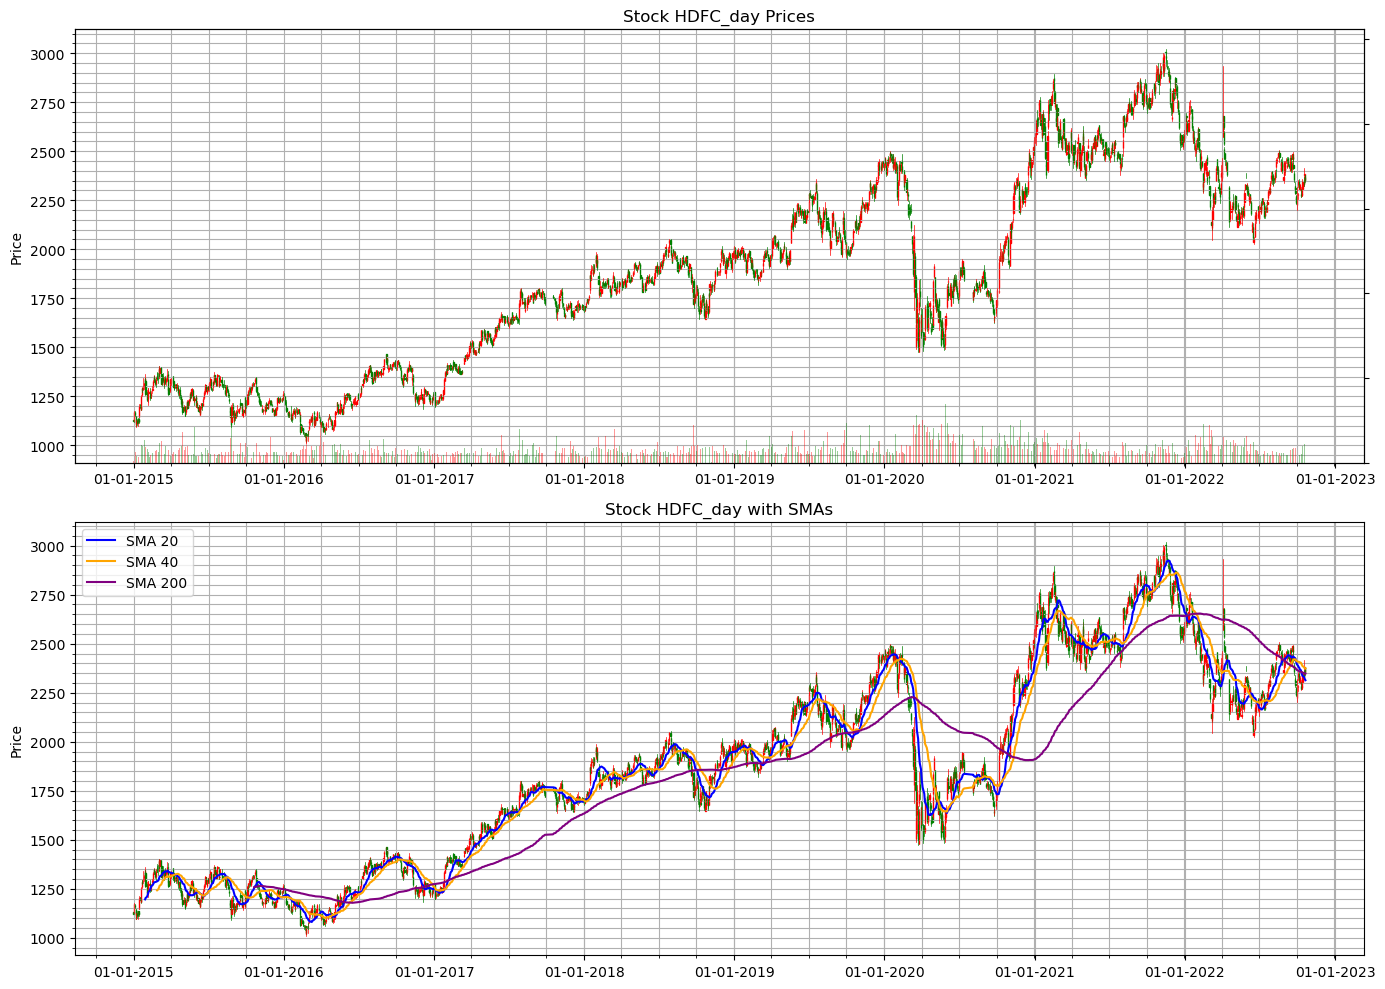

In [43]:
plot_candlestick_smas(df)

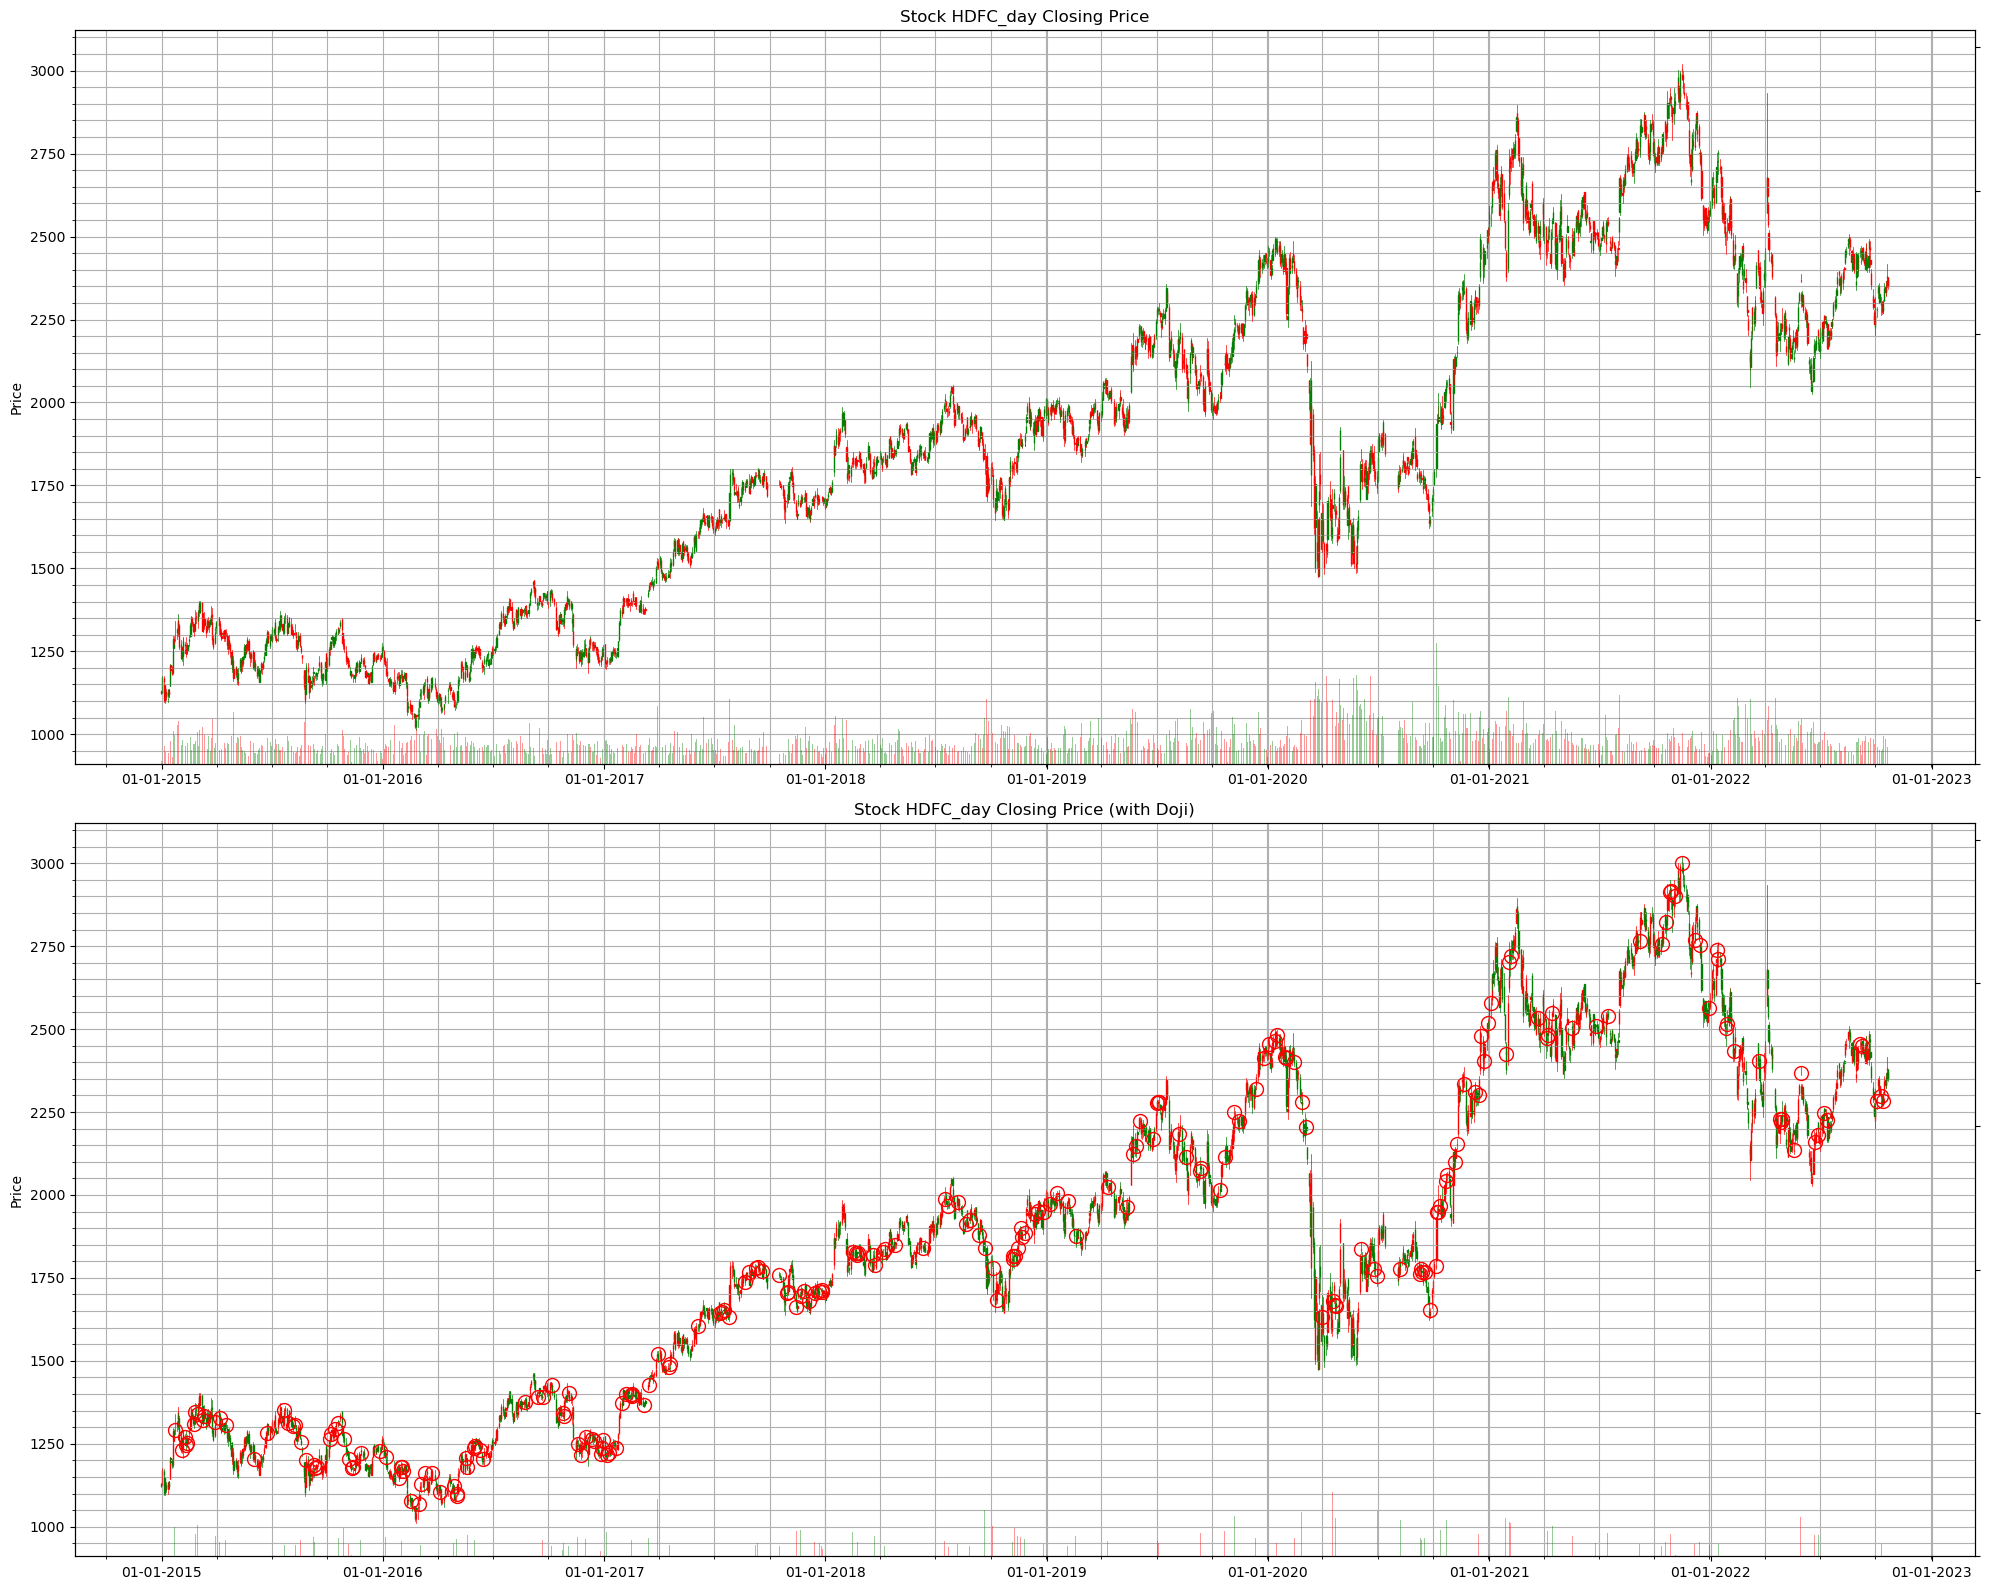

In [44]:
plot_candlestick_doji(df)

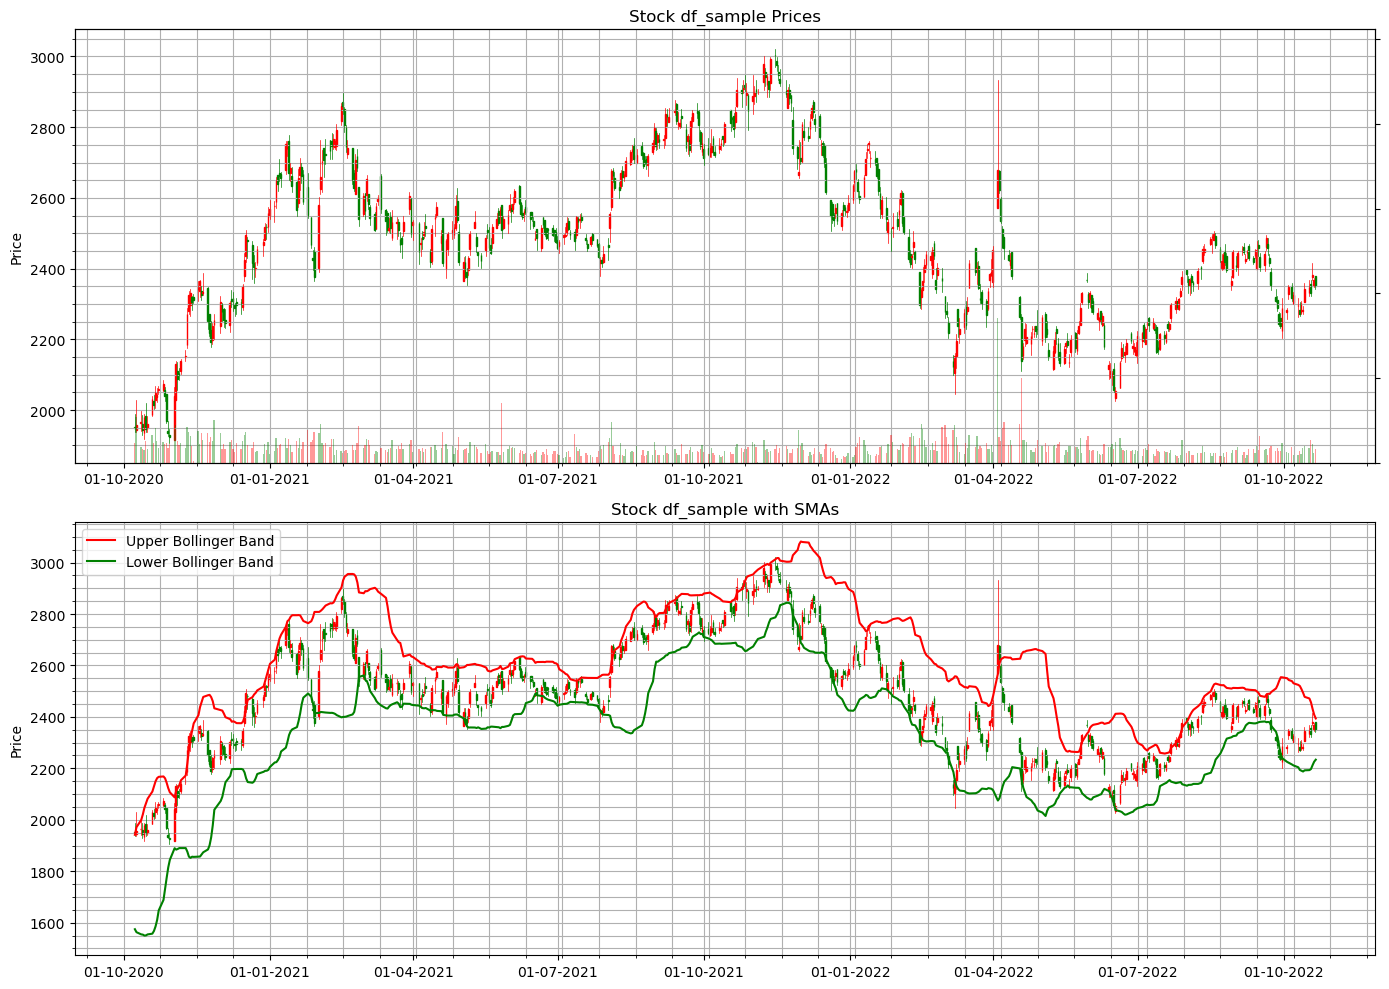

In [45]:
df_sample = df.iloc[1400:, :]
plot_bollinger_bands(df_sample)

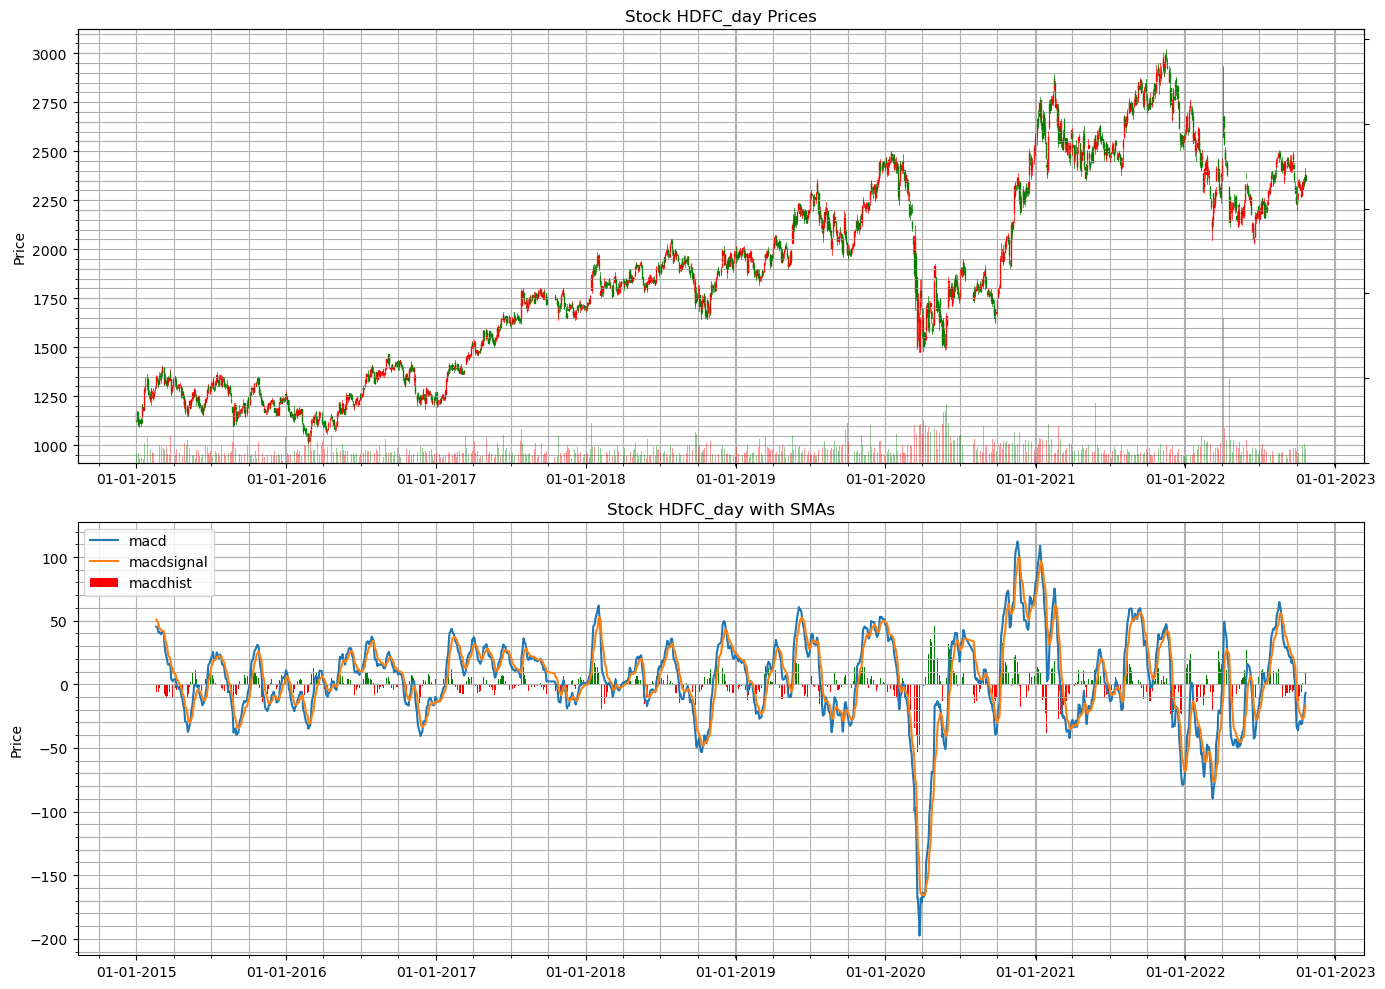

In [46]:
plot_MACD(df)

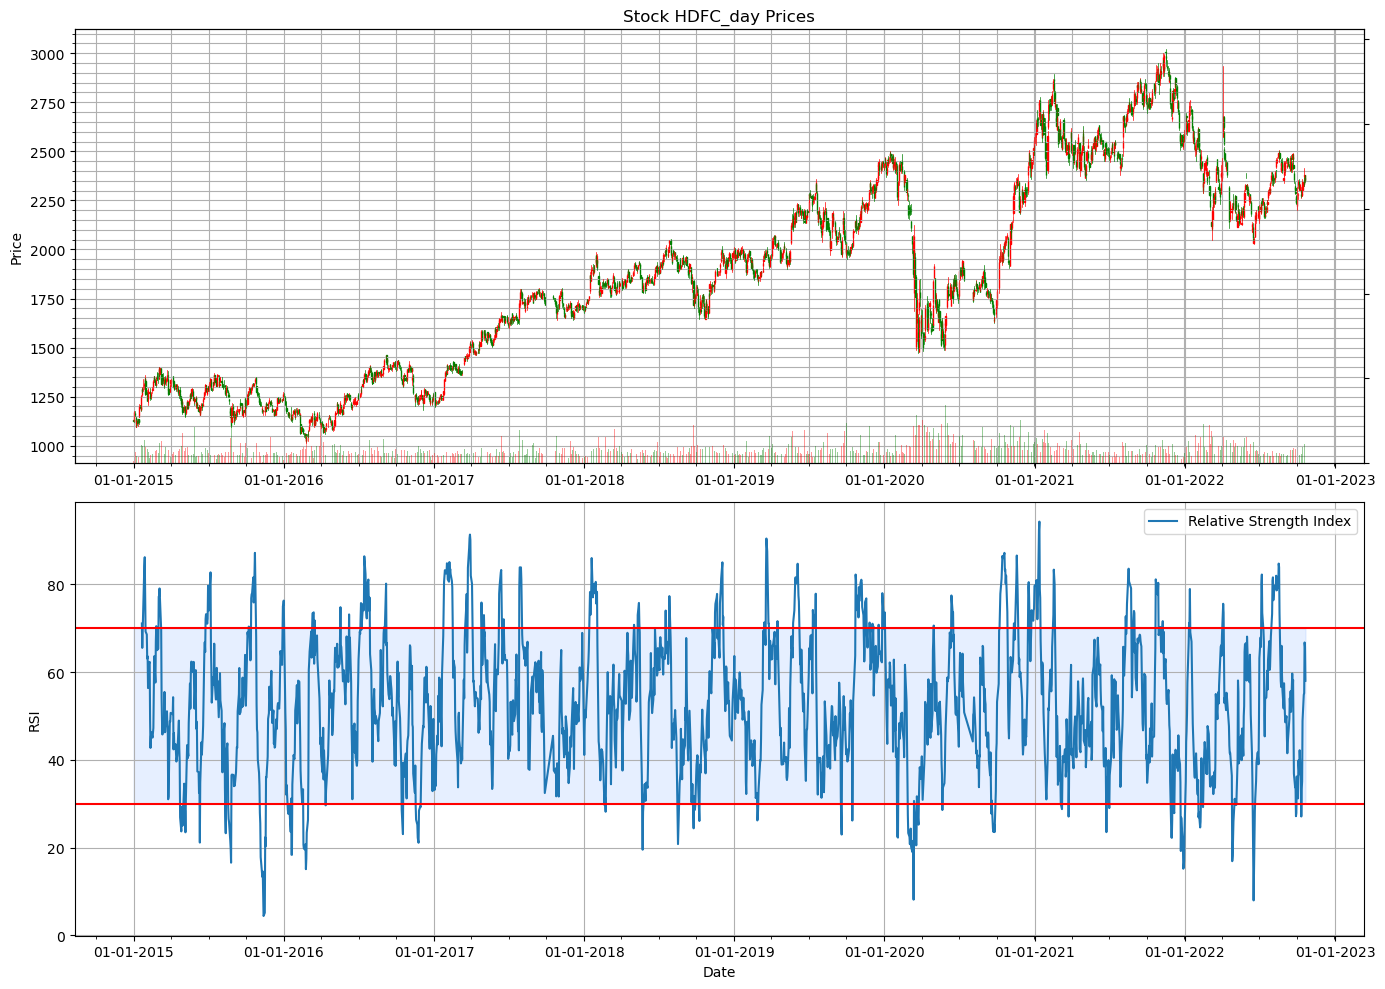

In [47]:
plot_RSI(df)

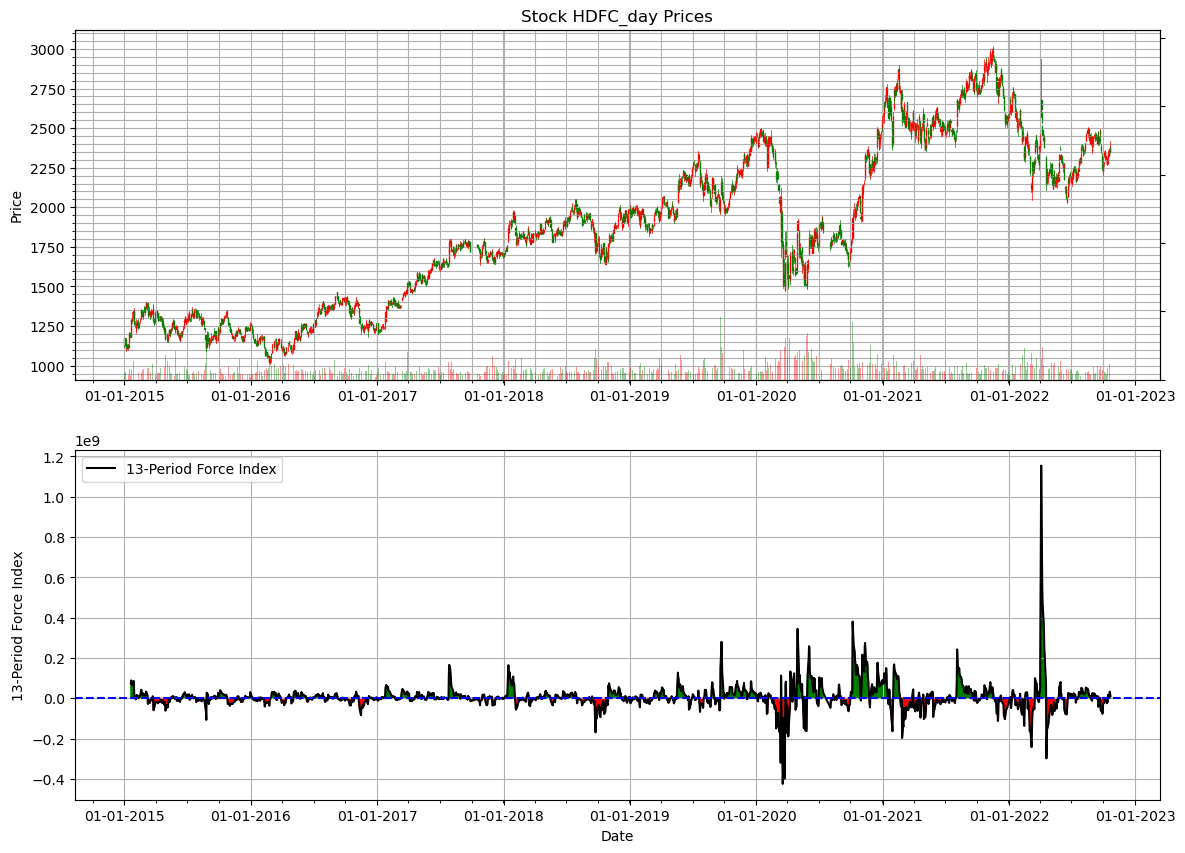

In [48]:
plot_Force_Index(df)

## Exporting Data With Technical Indicators 

In [50]:
for df_name, df in final_data.items():
    file_name = f'TI_Data/{df_name}'
    df.to_csv(file_name)